In [31]:
import numpy as np

import seaborn as sns

sns.set_theme()

In [32]:
instance_file = (
    "data/pidnebesna/LRM_ER_rewired/LRM_ER_nNodes100_density15_rew1_allInfo.npz"
)
data = np.load(instance_file)
A = data["10"]

<Axes: >

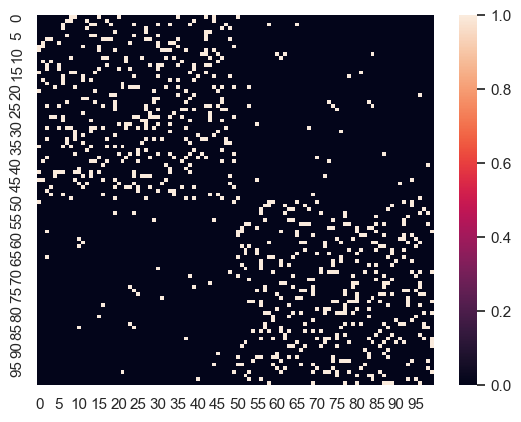

In [33]:
sns.heatmap(A)

Using cpu device


Loss: 0.022406, Tau: 0.5721: 100%|██████████| 3000/3000 [00:22<00:00, 135.74it/s]


<Axes: >

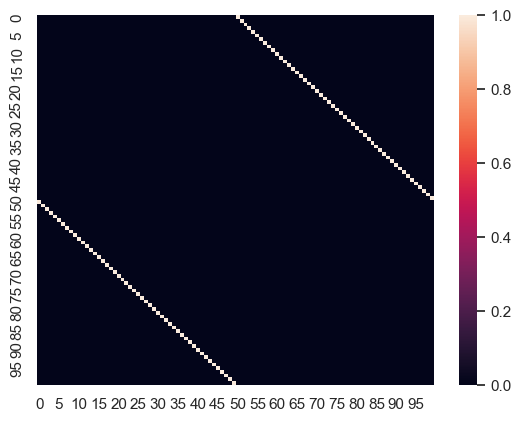

In [34]:
from AGS.methods import OT4P4AS

method = OT4P4AS(max_iter=3000)
results = method.solve(A, 0.001)

sns.heatmap(results["P"])

Using mps device


Loss: 0.118800, Tau: 0.5002: 100%|██████████| 5000/5000 [00:18<00:00, 274.60it/s]


<Axes: >

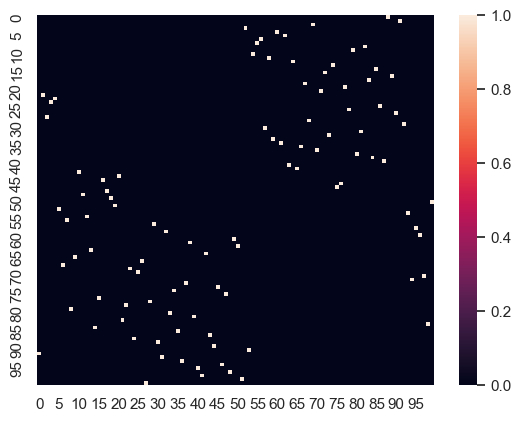

In [35]:
from AGS.methods import SoftSort

method = SoftSort(
    learning_rate=0.1, annealing_scheme="cosine", max_iter=5000, decay_steps=10000
)
results = method.solve(A, 0.2)

sns.heatmap(results["P"])

Change: 0.229129:   5%|▍         | 24/500 [00:00<00:00, 1285.69it/s]


<Axes: >

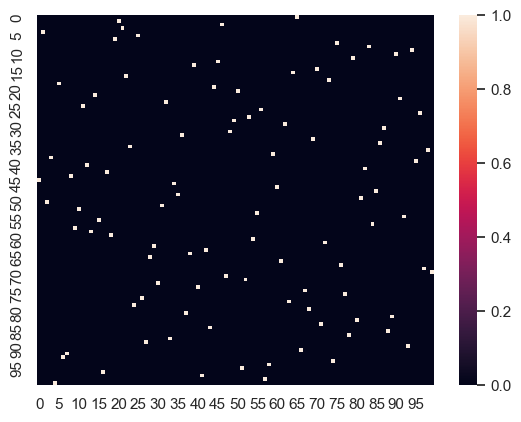

In [36]:
from AGS.methods import QSA

method = QSA()
results = method.solve(A, 0.2)

sns.heatmap(results["P"])

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:    20000
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:    10000
                     variables with only lower bounds:        0
                variables with lower and upper bounds:    10000
                     variables with only upper bounds:        0
Total number of equality constraints.................:      200
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -2.2857439e+04 1.90e+01 7.82e+01   0.0 0.00e+00    -  0.00e+00 0.00e+00 

<Axes: >

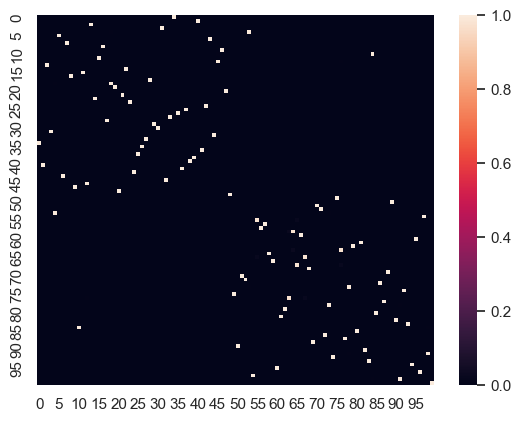

In [80]:
from AGS.methods import InteriorPoint

method = InteriorPoint(verbose=True)
results = method.solve(A, 0.2)

sns.heatmap(results["P"])

Using cpu device
Optimizing...
Terminated - min step_size reached after 43 iterations, 0.44 seconds.



<Axes: >

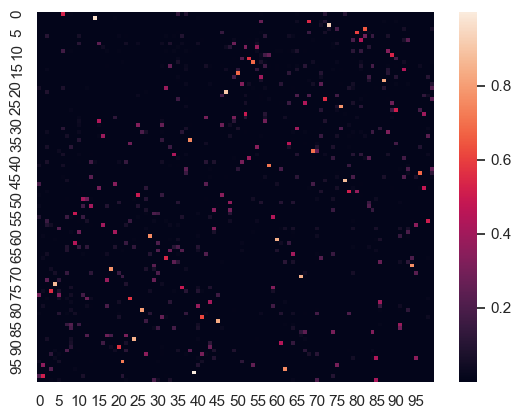

In [ ]:
from AGS.methods import Manifold

method = Manifold(optimizer="steepest_descent", max_iter=3000)
results = method.solve(A, 0.2)

sns.heatmap(results["P"])

Using cpu device
Using mps device
Using cpu device


Change: 0.361768:   5%|▍         | 23/500 [00:00<00:01, 406.46it/s]


Optimizing...
Terminated - min step_size reached after 56 iterations, 1.21 seconds.



Change: 0.158114:   4%|▍         | 22/500 [00:00<00:00, 1228.38it/s]


Optimizing...
Terminated - min step_size reached after 96 iterations, 0.77 seconds.



Change: 0.301993:   6%|▌         | 28/500 [00:00<00:00, 1221.62it/s]


Optimizing...
Terminated - max iterations reached after 3.35 seconds.



Change: 0.247818:   5%|▍         | 24/500 [00:00<00:00, 1277.89it/s]


Optimizing...
Terminated - max iterations reached after 3.08 seconds.



Change: 0.347411:   5%|▍         | 24/500 [00:00<00:00, 1243.08it/s]


Optimizing...
Terminated - min step_size reached after 77 iterations, 0.49 seconds.



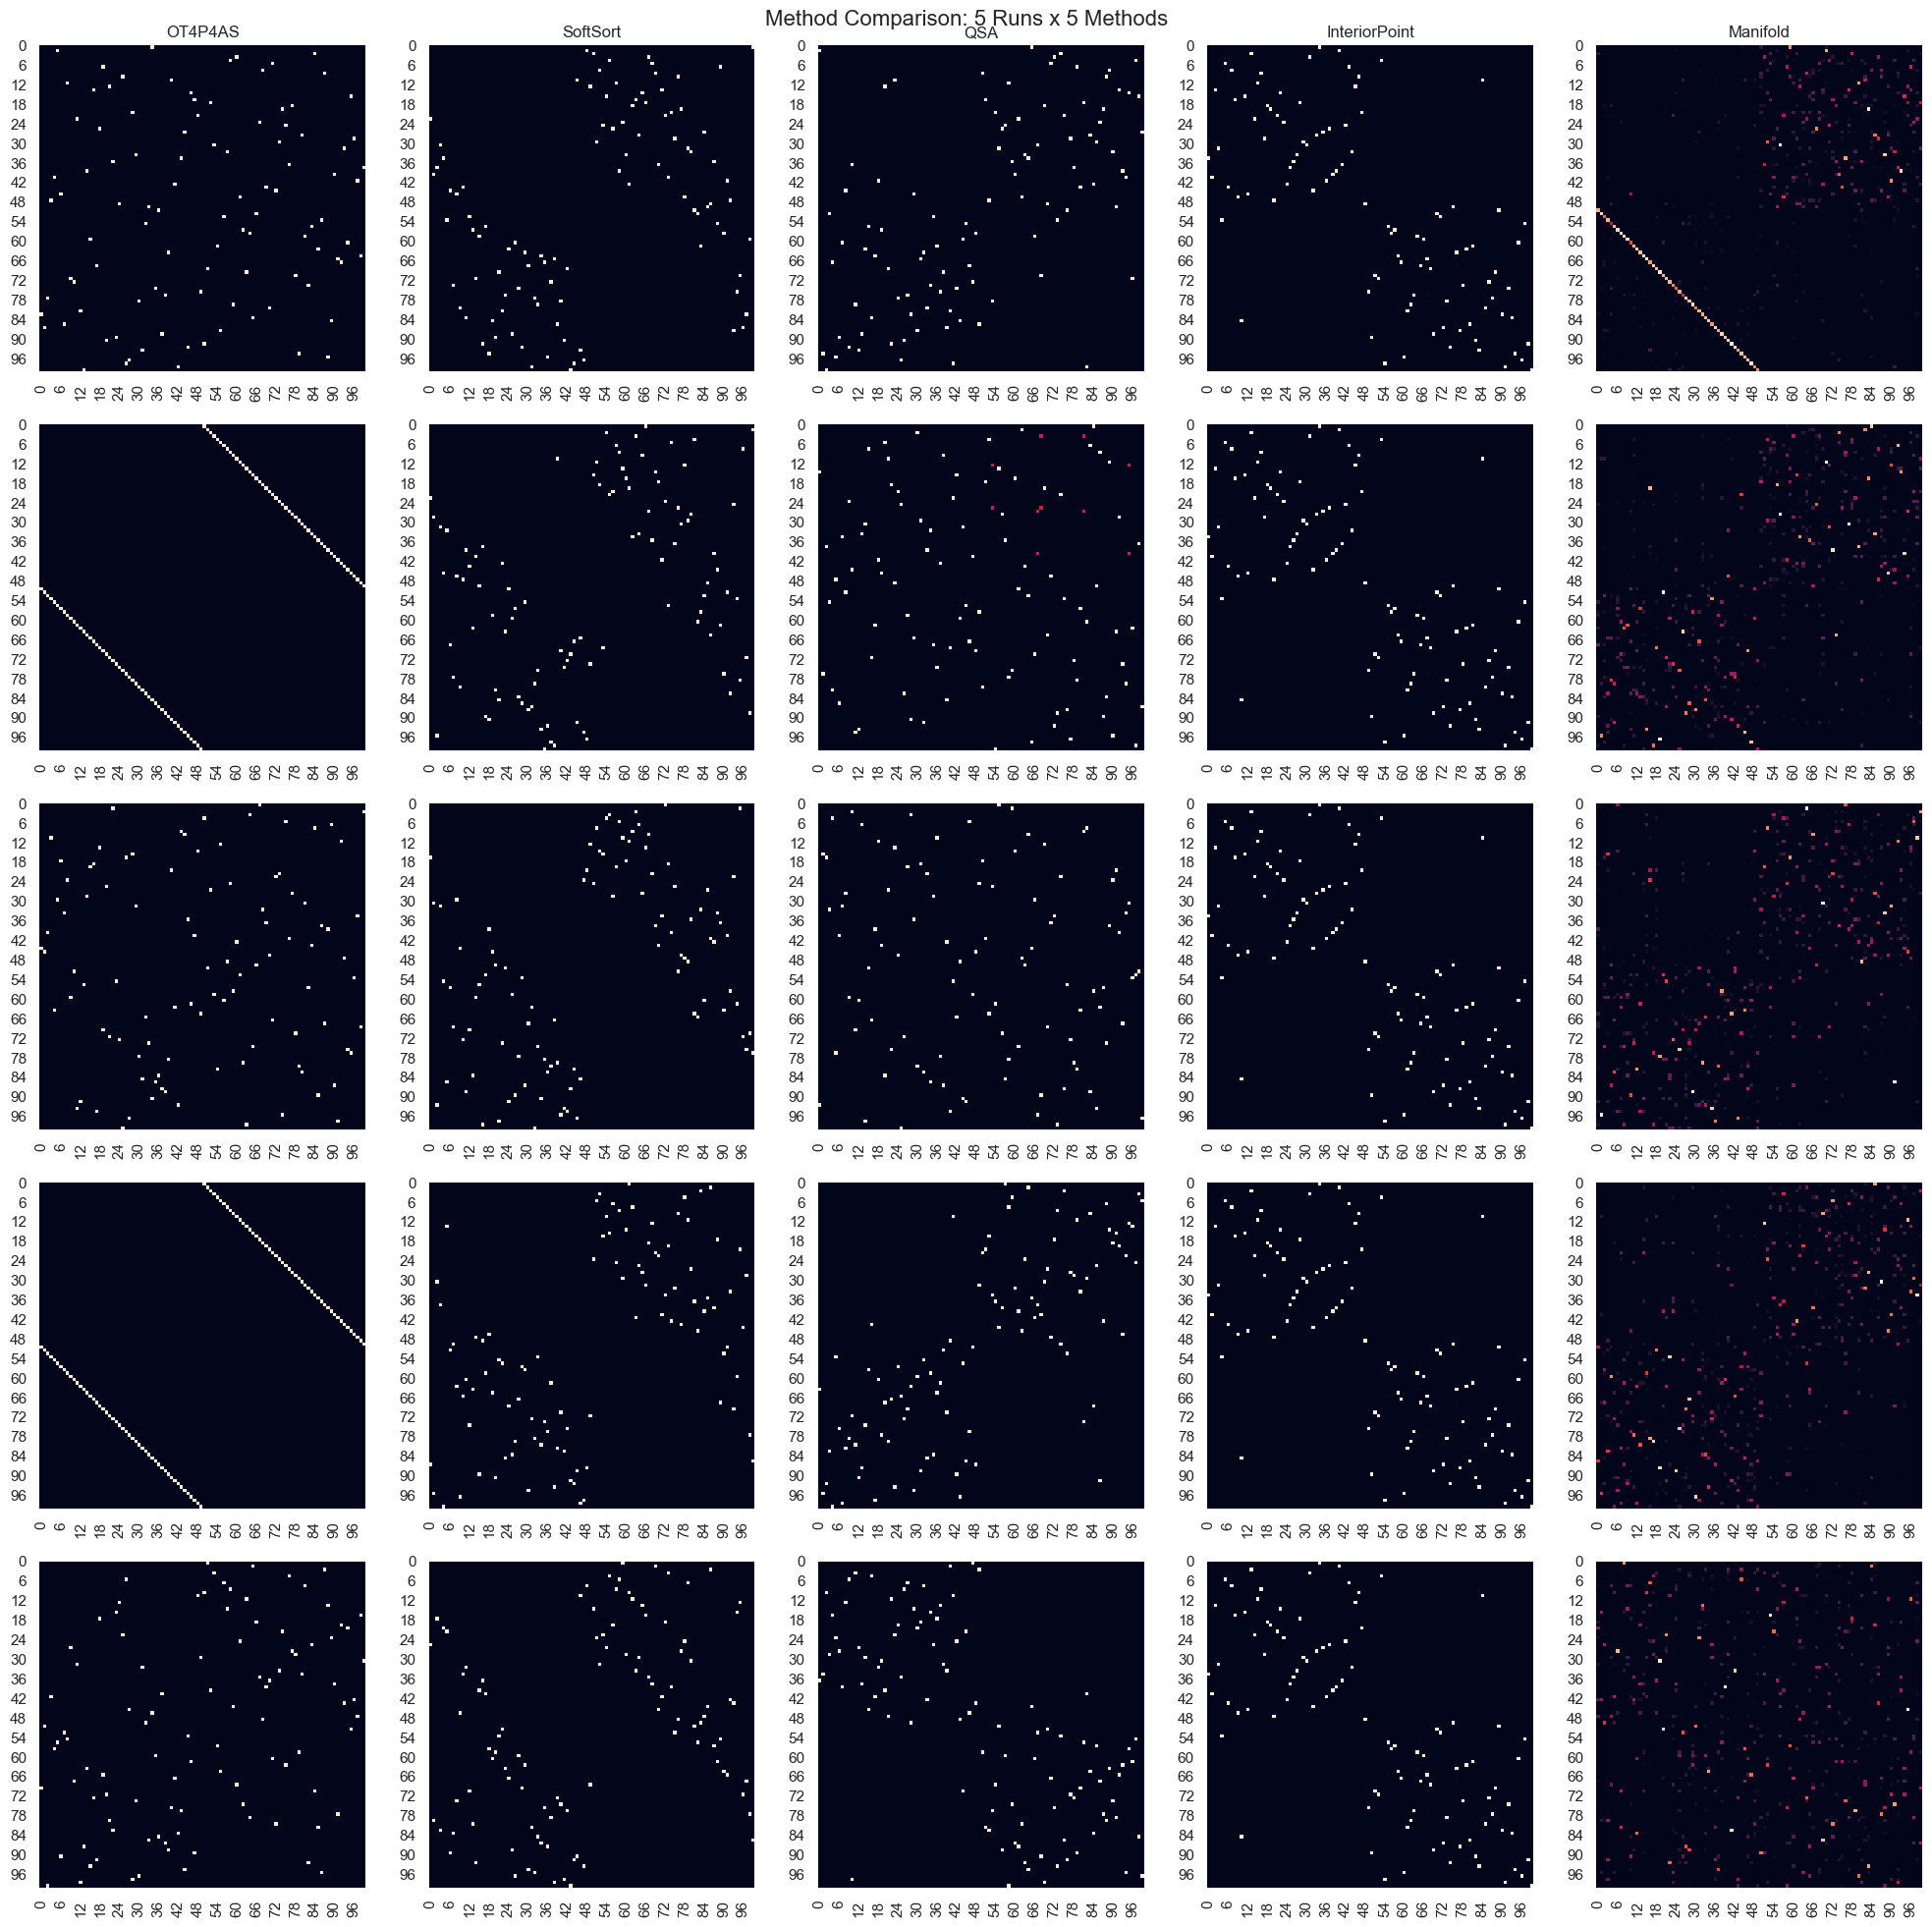

In [74]:
import matplotlib.pyplot as plt

instance_file = (
    "data/pidnebesna/LRM_ER_rewired/LRM_ER_nNodes100_density15_rew1_allInfo.npz"
)
data = np.load(instance_file)
A = data["10"]

# Define methods and their parameters
methods = [
    ("OT4P4AS", OT4P4AS(max_iter=3000), 0.001),
    (
        "SoftSort",
        SoftSort(
            learning_rate=0.1,
            annealing_scheme="cosine",
            max_iter=5000,
            decay_steps=10000,
        ),
        0.2,
    ),
    ("QSA", QSA(), 0.2),
    ("InteriorPoint", InteriorPoint(verbose=False), 0.2),
    ("Manifold", Manifold(optimizer="steepest_descent", max_iter=3000), 0.2),
]

# Create subplot grid
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
fig.suptitle("Method Comparison: 5 Runs x 5 Methods", fontsize=16)

# Run experiments
for run in range(5):
    for col, (name, method, reg_param) in enumerate(methods):
        # Solve and plot
        results = method.solve(A, reg_param)
        sns.heatmap(results["P"], ax=axes[run, col], cbar=False, square=True)

        # Set titles only for first row
        if run == 0:
            axes[run, col].set_title(name, fontsize=12)

        # Set y-labels only for first column
        if col == 0:
            axes[run, col].set_ylabel(f"Run {run + 1}", fontsize=12)

        # Remove axis labels for cleaner look
        axes[run, col].set_xlabel("")
        axes[run, col].set_ylabel("")

plt.tight_layout()
plt.show()